In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline

In [ ]:
!pip install openpyxl


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving height-weight.csv to height-weight.csv


In [ ]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

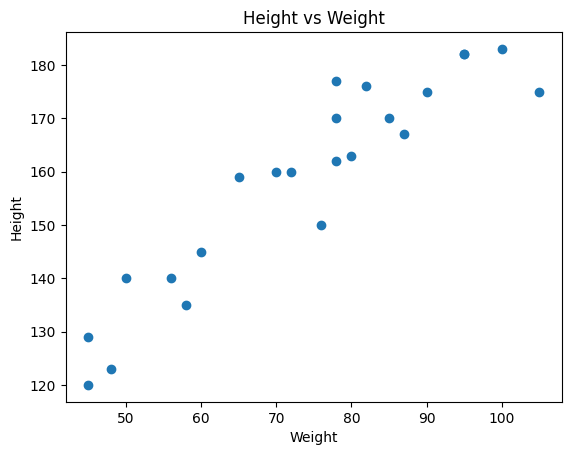

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.ylabel('Height')
plt.xlabel('Weight')
plt.title('Height vs Weight')


In [ ]:
#finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


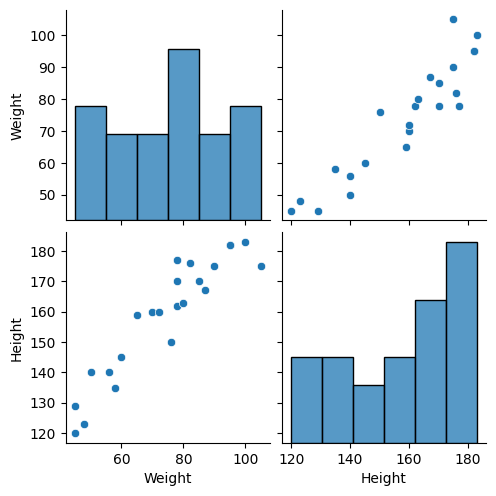

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
#divide the data into dependent and independent features
x=df[['Weight']] #independent feature should be data frame of 2 dim array

#dependent feature is fine with 1 D or series as it is mostly one column in regression problem statement
y=df['Height']

In [ ]:
np.array(x).shape



(23,)

In [ ]:
np.array(x).shape

(23, 1)

In [ ]:
#for just explaining
x_series=df['Weight']
np.array(x_series).shape


(23,)

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape

(17, 1)

In [ ]:
#standardization to convert into unitless, that is by z score
#here we stardize on;y Input feature as that is only part of gradient descent
from sklearn.preprocessing import StandardScaler



In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)


In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
#applying simple linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope:",regression.coef_ )  #B1
print("Intercept:",regression.intercept_ )

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


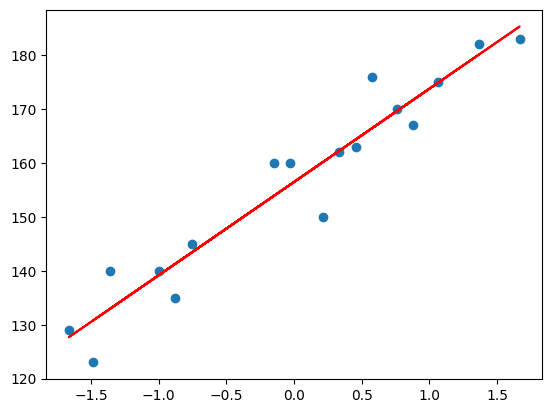

In [ ]:
##plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color='red')

In [ ]:
#prediction for test data
y_pred=regression.predict(x_test)


In [ ]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(score)

114.84069295228699
9.66512588679501
10.716374991212605
0.7360826717981276


In [ ]:
#display the adjusted rsqr
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

adjusted R2


In [ ]:
##OLS technique
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,x_train).fit()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 25 May 2025   Prob (F-statistic):                       0.664
Time:                        13:40:21   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
##prediction for new data/ weight value that is x value
regression.predict(scaler.transform([[72]])) ## scaling transform should always be in mind

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])